In [54]:
from evaluation import *
import time
from pm4py.algo.discovery.inductive import algorithm as inductive_miner


In [40]:
filename = 'filtered_3way_after_80%.xes'
# filename = 'BPI_Challenge_2012.xes'


In [100]:
# log, VARIANT = read_xes(filename, n_DPI = 15)
log, VARIANT = read_xes(filename)


==================================================================================================== =READ THE XES FILElength of log 2534 
length of event 13589 
number of variants : 26


In [96]:
# variants_count = case_statistics.get_variant_statistics(log_filtered)
# log_filtered = variants_filter.apply(log, [VARIANT[0]])    
net, im, fm = heuristics_miner.apply(log)
# net, im, fm = inductive_miner.apply(log)

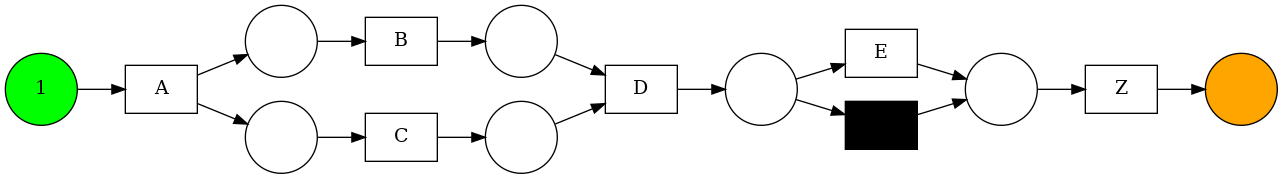

In [97]:
gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)


In [121]:
net.places

{intplace_D,
 pre_B,
 pre_C,
 pre_Z,
 sink0,
 source0,
 splace_in_D_B_0,
 splace_in_D_C_0}

In [117]:

from pm4py.algo.conformance.tokenreplay import algorithm as token_replay
replayed_traces = token_replay.apply(log, net, im,fm)

In [112]:
replayed_traces[2500:]

[{'trace_is_fit': True,
  'trace_fitness': 1.0,
  'activated_transitions': [A, B, C, D, hid_7, Z],
  'reached_marking': ['sink0:1'],
  'enabled_transitions_in_marking': set(),
  'transitions_with_problems': [],
  'missing_tokens': 0,
  'consumed_tokens': 8,
  'remaining_tokens': 0,
  'produced_tokens': 8},
 {'trace_is_fit': True,
  'trace_fitness': 1.0,
  'activated_transitions': [A, B, C, D, hid_7, Z],
  'reached_marking': ['sink0:1'],
  'enabled_transitions_in_marking': set(),
  'transitions_with_problems': [],
  'missing_tokens': 0,
  'consumed_tokens': 8,
  'remaining_tokens': 0,
  'produced_tokens': 8},
 {'trace_is_fit': True,
  'trace_fitness': 1.0,
  'activated_transitions': [A, B, C, D, hid_7, Z],
  'reached_marking': ['sink0:1'],
  'enabled_transitions_in_marking': set(),
  'transitions_with_problems': [],
  'missing_tokens': 0,
  'consumed_tokens': 8,
  'remaining_tokens': 0,
  'produced_tokens': 8},
 {'trace_is_fit': True,
  'trace_fitness': 1.0,
  'activated_transitions': [

[A, B, C, C, D, Z]

In [84]:
good = 0
bad = 0
missing = 0
for r in replayed_traces :
    good += len([i for i in r['activated_transitions'] if str(i).find('hid')==-1])
    bad +=len(r['transitions_with_problems'])
    missing += r['missing_tokens']

In [85]:
missing

2725

In [ ]:
variants_count

# the number of Traces 

In [86]:

#number of traces
len(log)

2534

# Activities 

In [94]:

tasks = set()
for v in VARIANT:
    tasks=tasks.union(set(v.split(',')))
tasks

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'Z'}

In [60]:

from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
dfg = dfg_discovery.apply(log)

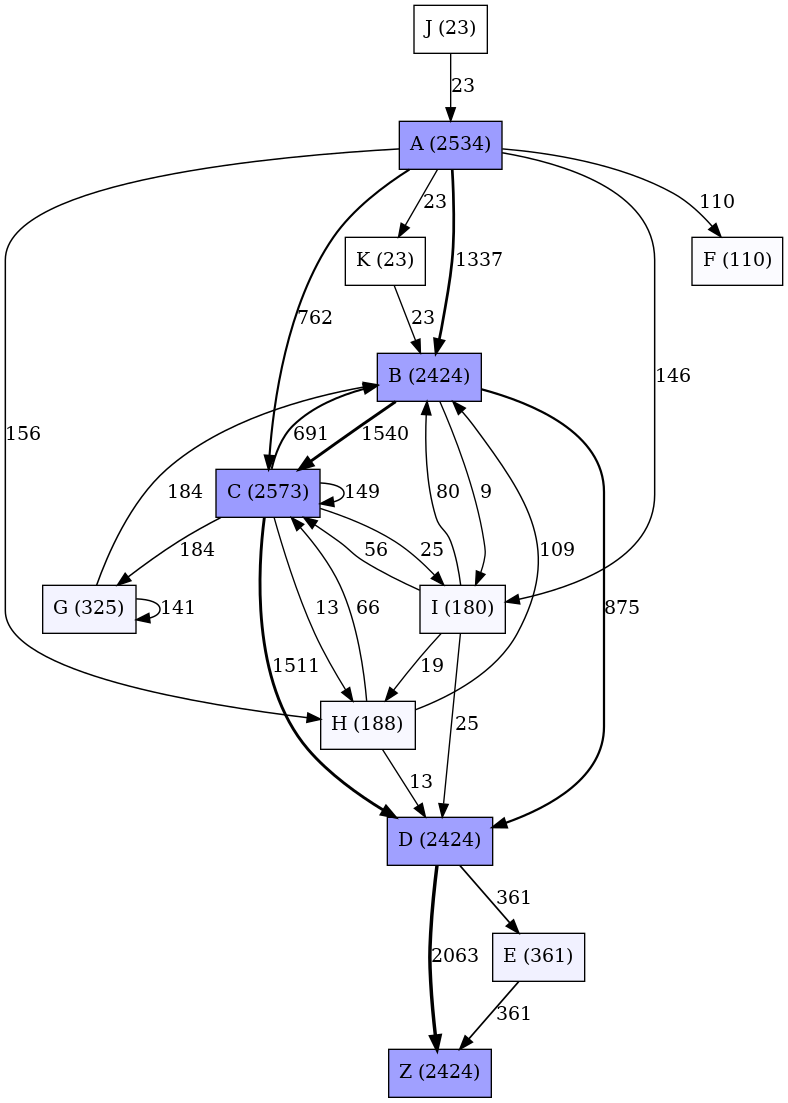

In [62]:
from pm4py.visualization.dfg import visualizer as dfg_visualization
gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)

In [63]:
dfg

Counter({('A', 'B'): 1337,
         ('B', 'C'): 1540,
         ('C', 'D'): 1511,
         ('D', 'Z'): 2063,
         ('A', 'C'): 762,
         ('C', 'B'): 691,
         ('B', 'D'): 875,
         ('D', 'E'): 361,
         ('E', 'Z'): 361,
         ('A', 'F'): 110,
         ('C', 'G'): 184,
         ('G', 'B'): 184,
         ('A', 'H'): 156,
         ('H', 'B'): 109,
         ('A', 'I'): 146,
         ('I', 'B'): 80,
         ('I', 'C'): 56,
         ('H', 'C'): 66,
         ('J', 'A'): 23,
         ('I', 'H'): 19,
         ('A', 'K'): 23,
         ('K', 'B'): 23,
         ('C', 'I'): 25,
         ('I', 'D'): 25,
         ('C', 'C'): 149,
         ('G', 'G'): 141,
         ('C', 'H'): 13,
         ('H', 'D'): 13,
         ('B', 'I'): 9})

In [47]:
len(replayed_traces)

2534

In [9]:
len(log)

13087

hello
0.00048065185546875


In [27]:
start = time.time()

list_fit=[]
for v in VARIANT : 
    log_filtered = variants_filter.apply(log, [v])
    
    net, im, fm = heuristics_miner.apply(log_filtered)
#     gviz = pn_visualizer.apply(net, im, fm)
#     pn_visualizer.view(gviz)
    fitness = replay_fitness_evaluator.apply(
            log_filtered, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)['log_fitness']
    list_fit.append(fitness)
    if fitness <1 : print(fitness)

end = time.time()
print(end - start)

NameError: name 'time' is not defined

In [29]:

def test(type=['hm','im']):
    
    start = time.time()

    from pm4py.objects.log.importer.xes import importer as xes_importer
    from pm4py.algo.discovery.inductive import algorithm as inductive_miner

    list_fit=[]
    for i, v in enumerate(VARIANT) : 
        log_filtered = variants_filter.apply(log, v)

        if type == 'hm' : 
            net, im, fm = inductive_miner.apply(log_filtered)
            
        else :
            net, im, fm = heuristics_miner.apply(log_filtered)

    #     gviz = pn_visualizer.apply(net, im, fm)
    #     pn_visualizer.view(gviz)
        fitness = replay_fitness_evaluator.apply(
                log_filtered, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)['log_fitness']
        list_fit.append(fitness)
        if fitness <1 : 
            print(fitness)
            print(i)
            print(v)
        if i%50 == 0 : 
            print("{} traces have been checked out of {} at time{}".format(i, len(VARIANT), time.time() - start))

    end = time.time()
    print(end - start)

0 traces have been checked out of 4366 at time0.20103693008422852
50 traces have been checked out of 4366 at time9.354735851287842
100 traces have been checked out of 4366 at time18.816876649856567
150 traces have been checked out of 4366 at time28.589715480804443
200 traces have been checked out of 4366 at time38.65570831298828
250 traces have been checked out of 4366 at time48.79580283164978
300 traces have been checked out of 4366 at time58.797099351882935
0.9957943851697983
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SENT_BACK,W_Valideren aanvraag,W_Nabellen offertes,W_Valideren aanvraag,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen incomplete dossiers,W_Valideren aanvraag,W_Nabellen incomplete

3100 traces have been checked out of 4366 at time629.1968061923981
3150 traces have been checked out of 4366 at time639.2631602287292
0.9955947136563876
A_SUBMITTED,A_PARTLYSUBMITTED,W_Afhandelen leads,W_Afhandelen leads,A_PREACCEPTED,W_Completeren aanvraag,W_Afhandelen leads,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SELECTED,O_CANCELLED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SENT_BACK,W_Valideren aanvraag,W_Nabellen offertes,W_Valideren aanvraag,W_Nabellen incomplete dossiers,W_Valideren aanvraag,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen

In [32]:

def test(type=['hm','im']):
    
    start = time.time()

    from pm4py.objects.log.importer.xes import importer as xes_importer
    from pm4py.algo.discovery.inductive import algorithm as inductive_miner

    list_fit=[]
    for i, v in enumerate(VARIANT) : 
        log_filtered = variants_filter.apply(log, v)

        if type == 'im' : 
            net, im, fm = inductive_miner.apply(log_filtered)
            
        else :
            net, im, fm = heuristics_miner.apply(log_filtered)

    #     gviz = pn_visualizer.apply(net, im, fm)
    #     pn_visualizer.view(gviz)
        fitness = replay_fitness_evaluator.apply(
                log_filtered, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)['log_fitness']
        list_fit.append(fitness)
        if fitness <1 : 
            print(fitness)
            print(i)
            print(v)
        if i%50 == 0 : 
            print("{} traces have been checked out of {} at time{}".format(i, len(VARIANT), time.time() - start))

    end = time.time()
    print(end - start)

In [33]:

test('hm')

0 traces have been checked out of 4366 at time0.19300436973571777
0.997561825148032
22
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_CANCELLED,W_Completeren aanvraag
0.9794520547945206
26
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offer

0.9977578475336323
94
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,A_FINALIZED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,O_SELECTED,O_CANCELLED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offerte

0.989010989010989
186
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,A_FINALIZED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,O_SELECTED,O_CANCELLED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SENT_BACK,W_Valideren aanvraag,W_Nabellen offertes,W_Valideren aanvraag,O_ACCEPTED,A_REGISTERED,A_APPROVED,A_ACTIVATED,W_Valideren aanvraag
0.9863636363636363
193
A_SUBMITT

0.995049504950495
245
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SENT_BACK,W_Valideren aanvraag,W_Nabellen offertes,W_Valideren aanvraag,W_Valideren aanvraag,W_Valideren aanvraag,W_Valideren aanvraag,W_Valideren aanvraag,A_APPROVED,A_REGISTERED,O_ACCEPTED,A_ACTIVATED,W_Valideren aanvraag
0.

0.9898128686690624
345
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SENT_BACK,W_Valideren aanvraag,W_Nabellen offertes,W_Valideren aanvraag,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen incomplete dossiers,W_Valideren aanvraag,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,O_SELECTED,O_CANCELLED,O_CREATED,O_SENT,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabel

0.9977460555972952
455
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_CANCELLED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag
0.9914529914529915
456
A_SUBMITTED,A_PARTLYSUBMITTED,W_Afhandelen leads,W_Afhandelen leads,A_PREACCEPTED,W_Completeren aanvraag,W_Afhandelen leads,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,W_Co

0.9959677419354839
536
A_SUBMITTED,A_PARTLYSUBMITTED,W_Afhandelen leads,W_Afhandelen leads,A_PREACCEPTED,W_Completeren aanvraag,W_Afhandelen leads,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,A_FINALIZED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SENT_BACK,W_Valideren aanvraag,W_Nabellen offertes,W_Valideren aanvraag,W_Valideren aanvraag,W_Valideren aanvraag,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen incomplete dossiers,W_Valideren aanvraag,W_Nabellen incom

0.9962121212121212
561
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SENT_BACK,W_Valideren aanvraag,W_Nabellen offertes,W_Valideren aanvraag,W_Nabellen incomplete dossiers,W_Valideren aanvraag,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,O_SENT_BACK,W_Valideren aanvraag,W_Nabellen incomplete dossiers,W_Valideren aanvraag,A_

0.990506329113924
679
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,A_FINALIZED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SENT_BACK,W_Valideren aanvraag,W_Nabellen offertes,W_Valideren aanvraag,W_Nabellen incomplete dossiers,W_Valideren aanvraag,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Valideren aanvraag,W_Nabellen incomplete dossiers,W_Valideren aanvraag,O_SELECTED,O_CAN

800 traces have been checked out of 4366 at time146.69384694099426
0.998
811
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SENT_BACK,W_Valideren aanvraag,W_Nabellen offertes,W_Valideren aanvraag,W_Valideren aanvraag,W_Valideren aanvraag,W_Nabellen incomplete dossiers,W_Valideren aanvraag,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Valideren aanvraag,W_Nabellen incomplete dossiers,W_Valide

0.9887640449438202
842
A_SUBMITTED,A_PARTLYSUBMITTED,W_Afhandelen leads,W_Afhandelen leads,A_PREACCEPTED,W_Completeren aanvraag,W_Afhandelen leads,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,A_FINALIZED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,

0.9917582417582418
912
A_SUBMITTED,A_PARTLYSUBMITTED,W_Afhandelen leads,W_Afhandelen leads,A_PREACCEPTED,W_Completeren aanvraag,W_Afhandelen leads,W_Completeren aanvraag,A_ACCEPTED,A_FINALIZED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SELECTED,O_CANCELLED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SELECTED,O_CANCELLED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SENT_BACK,W_Valideren aanvraag,W_Nabellen offertes,W_Valideren aanvraag,A_APPROVED,O_ACCEPTED,

1000 traces have been checked out of 4366 at time182.66641497612
0.96875
1005
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,A_CANCELLED,O_CANCELLED,W_Nabellen offertes
0.9743589743589743
1010
A_SUBMITTED,A_PARTLYSUBMITTED,W_Afhandelen leads,W_Afhandelen leads,A_PREACCEPTED,W_Completeren aanvraag,W_Afhandelen leads,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_N

0.9990856446205425
1075
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_CANCELLED,W_Completeren aanvraag
0.9994617868675996
1098
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W

0.972972972972973
1195
A_SUBMITTED,A_PARTLYSUBMITTED,W_Afhandelen leads,W_Afhandelen leads,A_PREACCEPTED,W_Completeren aanvraag,W_Afhandelen leads,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,A_CANCELLED,O_CANCELLED,W_Nabellen offertes
1200 traces have been checked out of 4366 at time219.81057119369507
0.9963235294117647
1202
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen

0.9880952380952381
1227
A_SUBMITTED,A_PARTLYSUBMITTED,W_Afhandelen leads,W_Afhandelen leads,A_PREACCEPTED,W_Completeren aanvraag,W_Afhandelen leads,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,O_SELECTED,O_CANCELLED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SENT_BACK,W_Valideren aanvraag,W_Nabellen offertes,W_Valideren aanvraag,W_Nabellen incomplete dossiers,W_Valideren aanvraag,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Valideren aanvraag,W_Nabellen incomplete dossiers,W_Valideren aanvraag,W_Valideren aanvraag,W_Valideren aanvraag,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen incomplete dossiers,W_Valideren aanvraag,W_Nabellen incomplete dossiers,O_ACCEPTED,A_REGISTERED,A_APPROVED,A_ACTIVATED,W_Nabellen incomplete dossiers
0.9982788296041308
1231
A_SUBMITTED,A_PA

0.988
1269
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,O_SELECTED,O_CANCELLED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SENT_BACK,W_Valideren aanvraag,W_Nabellen offertes,W_Valideren aanvraag,W_Valideren aanvraag,W_Valideren aanvraag,W_Valideren aanvraag,W_Valideren aanvraag,W_Valideren aanvraag,W_Valideren aanvraag,W_Valideren aanvraag,W_Valideren aanvraag,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen incomplete dossiers,W_Valideren aanvraag,W_Nabellen incomplete dossiers,O_ACCEPTED,A_ACTIVATED,A_APPROVED,A_REGISTERED,W_Nabellen incomplete dossiers
0.9746835443037974
1271
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren 

0.9722222222222222
1319
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,A_CANCELLED,O_CANCELLED,W_Nabellen offertes
0.9924242424242424
1330
A_SUBMITTED,A_PARTLYSUBMITTED,W_Afhandelen leads,W_Afhandelen leads,A_PREACCEPTED,W_Completeren aanvraag,W_Afhandelen leads,W_Completeren aanvraag,A_ACCEPTED,A_FINALIZED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_N

0.9705882352941176
1379
A_SUBMITTED,A_PARTLYSUBMITTED,W_Afhandelen leads,W_Afhandelen leads,W_Afhandelen leads,W_Afhandelen leads,A_PREACCEPTED,W_Completeren aanvraag,W_Afhandelen leads,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,A_FINALIZED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,O_SELECTED,O_CANCELLED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SENT_BACK,W_Valideren aanvraag,W_Nabellen offertes,W_Valideren aanvraag,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen incomplete dossiers,W_Valideren aanvraag,W_Nabellen incomplete dossiers,O_ACCEPTED,A_REGISTERED,A_ACTIVATED,A_APPROVED,W_Nabellen incomplete dossiers
0.9807692307692308
1394
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,A_FINALIZED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_

0.9932177536176247
1509
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SELECTED,O_CANCELLED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SENT_BACK,W_Valideren aanvraag,W_Nabellen offertes,W_Valideren aanvraag,W_Valideren aanvraag,W_Valideren aanvraag,W_Nabellen incomplete dossiers,W_Valideren aanvraag,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_N

0.9980392156862745
1620
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabe

0.997191011235955
1660
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_FINALIZED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SELECTED,O_CANCELLED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen 

0.9980657640232108
1734
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,A_CANCELLED,O_CANCELLED
0.9985422740524781
1735
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,W_Nabellen offertes,

0.9972027972027973
1821
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SENT_BACK,W_Valideren aanvraag,W_Nabellen offertes,W_Valideren aanvraag,W_Valideren aanvraag,W_Valideren aanvraag,W_Nabellen incomplete dossiers,W_Valideren aanvraag,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen 

0.9789473684210527
1879
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,A_FINALIZED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SENT_BACK,W_Valideren aanvraag,W_Nabellen offertes,W_Valideren aanvraag,W_Valideren aanvraag,W_Valideren aanvraag,W_Nabellen incomplete dossiers,W_Valideren aanvraag,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,O_SELECTED,O_CANCELLED,O_CREATED,O_SENT,W_Nabelle

1950 traces have been checked out of 4366 at time359.8982470035553
0.9883933229003652
1964
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,A_FINALIZED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SELECTED,O_CANCELLED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SELEC

0.9959183673469387
2046
A_SUBMITTED,A_PARTLYSUBMITTED,W_Afhandelen leads,W_Afhandelen leads,A_PREACCEPTED,W_Completeren aanvraag,W_Afhandelen leads,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SENT_BACK,W_Valideren aanvraag,W_Nabellen offertes,W_Valideren aanvraag,W_Nabellen incomplete dossiers,W_Valideren aanvraag,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete d

0.9772727272727273
2087
A_SUBMITTED,A_PARTLYSUBMITTED,W_Afhandelen leads,W_Afhandelen leads,W_Afhandelen leads,W_Afhandelen leads,A_PREACCEPTED,W_Completeren aanvraag,W_Afhandelen leads,W_Completeren aanvraag,A_ACCEPTED,A_FINALIZED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SENT_BACK,W_Valideren aanvraag,W_Nabellen offertes,W_Valideren aanvraag,W_Nabellen incomplete dossiers,W_Valideren aanvraag,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Valideren aanvraag,W_Nabellen incomplete dossiers,W_Valideren aanvraag,O_SELECTED,O_CANCELLED,O_CREATED,O_SENT,W_Nabellen incomplete dossiers,W_Valideren aanvraag,W_Nabellen incomplete dossier

0.9937888198757764
2188
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SELECTED,O_CANCELLED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,A_DECLINED,O_DECLINED,W_Nabellen offertes
0.9714285714285714
2192
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,A_FINALIZED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,A_CANCELLED,O_CANCELLED,W_Nabellen offerte

0.9978723404255319
2272
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,O_SELECTED,O_CANCELLED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SELECTED,O_CANCELLED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SENT_BACK,W_Valideren aanvraag,W_Nabellen offertes,W_Valideren aanvraag,O_SELECTED,O_CANCELLED,O_CREATED,O_SENT,W_Nabellen incomplete dossiers,W_Valideren aanvraag,W_Nabellen incomplete dossiers,O_SENT_BACK,W_Valideren aanvraag,W_Nabellen incomplete dossiers,W_Valideren aanvraag,W_Nabellen incomplete dossiers,W_Valideren aanvraag,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dos

0.9972527472527473
2336
A_SUBMITTED,A_PARTLYSUBMITTED,W_Afhandelen leads,W_Afhandelen leads,A_PREACCEPTED,W_Completeren aanvraag,W_Afhandelen leads,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,A_FINALIZED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,O_SELECTED,O_CANCELLED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SELECTED,O_CANCELLED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_N

0.9807692307692308
2370
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,O_SELECTED,O_CANCELLED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,A_CANCELLED,O_CANCELLED,W_Nabellen offertes
0.9654335961188599
2376
A_SUBMITTED,A_PARTLYSUBMITTED,W_Afhandelen leads,W_Afhandelen leads,A_PREACCEPTED,W_Completeren aanvraag,W_Afhandelen leads,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,A_FINALIZED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,O_SELECTED,O_CANCELLED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_CANCELLED

0.9879518072289156
2462
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,A_FINALIZED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,O_SELECTED,O_CANCELLED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_

0.9855072463768115
2515
A_SUBMITTED,A_PARTLYSUBMITTED,W_Afhandelen leads,W_Afhandelen leads,W_Afhandelen leads,W_Afhandelen leads,A_PREACCEPTED,W_Completeren aanvraag,W_Afhandelen leads,W_Completeren aanvraag,A_ACCEPTED,A_FINALIZED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SENT_BACK,W_Valideren aanvraag,W_Nabellen offertes,W_Valideren aanvraag,W_Valideren aanvraag,W_Valideren aanvraag,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen incomplete dossiers,W_Valideren aanvraag,W_Nabellen incomplete dossiers,A_APPROVED,O_ACCEPTED,A_REGISTERED,A_ACTIVATED,W_Nabellen incomplete dossiers
0.9968944099378882
2522
A_SUBMITTED,A_PARTLYSUBMITTED,W_Afhandelen leads,W_Afhandelen leads,A_PREACCEPTED,W_Completeren aanvraag,W_Afhandelen leads,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SEN

0.9925742574257426
2584
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,A_FINALIZED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SELECTED,O_CANCELLED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SENT_BACK,W_Valideren aanvraag,W_Nabellen offertes,W_Valideren aanvraag,W_Nabellen incomplete dossiers,W_Valideren aanvraag,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete doss

0.9936708860759493
2618
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SENT_BACK,W_Valideren aanvraag,W_Nabellen offertes,W_Valideren aanvraag,W_Valideren aanvraag,W_Valideren aanvraag,W_Nabellen incomplete dossiers,W_Valideren aanvraag,W_Nabellen incomplete dossiers,W_Valideren aanvraag,W_Nabellen incomplete dossiers,W_Valideren aanvraag,A_REGISTERED,A_APPROVED,A_ACTIVATED,O_ACCEPTED,W_Valideren aanvraag
0.9953271028037383
2622
A_SUBMITTED,A_PARTLYSUBMITTED,W_Afhandelen leads,W_Afhandelen leads,A_PREACCEPTED,W_Completeren aanvraag,W_Afhandelen leads,W_Completeren aanvraag,A_ACCEPTED,A_FINALIZED,O_SELECTED,O_CREAT

0.9979423868312758
2670
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SELECTED,O_CANCELLED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabe

0.9981447124304268
2739
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SELECTED,O_CANCELLED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabe

2750 traces have been checked out of 4366 at time511.89806866645813
0.996309963099631
2751
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,A_FINALIZED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,A_CANCELLED,O_CANCELLED,W_Nabellen offertes
0.9977827050997783
2753
A_SUBMITTED,A_PARTLYSUBMITTED,W_Afhandelen leads,W_Afhandelen leads,A_PREACCEPTED,W_Completeren aanvraag,W_Afhandelen leads,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,

0.9727272727272727
2833
A_SUBMITTED,A_PARTLYSUBMITTED,W_Afhandelen leads,W_Afhandelen leads,A_PREACCEPTED,W_Completeren aanvraag,W_Afhandelen leads,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,A_FINALIZED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SELECTED,O_CANCELLED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SELECTED,O_CANCELLED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SENT_BACK,W_Valideren aanvraag,W_Nabellen offertes,W_Valideren aanvraag,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen incomplete dossiers,W_Valideren aanvraag,W_Nabellen incomplete dossiers,O_ACCEPTED,A_REGISTERED,A_APPROVED,A_ACTIVATED,W_Nabellen incomplete dossiers
0.9896907216494846
2834
A_SUBMITTED,A_PARTLYSUBMITTED,

0.9977628635346756
2883
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SELECTED,O_CANCELLED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen off

0.993421052631579
2947
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SENT_BACK,W_Valideren aanvraag,W_Nabellen offertes,W_Valideren aanvraag,W_Valideren aanvraag,W_Valideren aanvraag,A_APPROVED,O_ACCEPTED,A_ACTIVATED,A_REGISTERED,W_Valideren aanvraag
2950 traces have been checked out of 4366 at time549.2917318344116
0.9950738916256158
2952
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen 

0.995176848874598
3022
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,A_FINALIZED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SELECTED,O_CANCELLED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SELECTED,O_CANCELLED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabel

0.9942607824528102
3063
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SELECTED,O_CANCELLED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SENT_BACK,W_Valideren aanvraag,W_Nabellen offertes,W_Valideren aanvraag,O_CANCELLED,A_CANCELLED,W_Valideren aanvraag
0.9885057471264368
3067
A_SUBMITTED,A_PARTLYSUBMITTED,W_Afhandelen leads,W_Afhandelen leads,A_PREACCEPTED,W_Completeren a

3150 traces have been checked out of 4366 at time586.3633608818054
0.975
3173
A_SUBMITTED,A_PARTLYSUBMITTED,W_Afhandelen leads,W_Afhandelen leads,W_Afhandelen leads,W_Afhandelen leads,A_PREACCEPTED,W_Completeren aanvraag,W_Afhandelen leads,W_Completeren aanvraag,A_ACCEPTED,A_FINALIZED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,O_SELECTED,O_CANCELLED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SENT_BACK,W_Valideren aanvraag,W_Nabellen offertes,W_Valideren aanvraag,W_Valideren aanvraag,W_Valideren aanvraag,W_Valideren aanvraag,W_Valideren aanvraag,W_Valideren aanvraag,W_Valideren aanvraag,O_SELECTED,O_CANCELLED,O_CREATED,O_SENT,W_Nabellen incomplete dossiers,W_Valideren aanvraag,W_Nabellen incomplete dossiers,O_ACCEPTED,A_REGISTERED,A_ACTIVATED,A_APPROVED,W_Nabellen incomplete dossiers
0.9976303317535545
3178
A_SUBMITTED,A_PART

0.9615384615384616
3241
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,A_FINALIZED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,O_SELECTED,O_CANCELLED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_CANCELLED,A_CANCELLED,W_Nabellen offertes
0.9861111111111112
3242
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,

0.9976851851851851
3345
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SELECTED,O_CANCELLED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,A_DECLINED,O_DECLINED,W_Nabellen offertes
3350 traces have been checked out of 4366 at time623.2887079715729
0.9884393063583815
3351
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SEN

0.988479262672811
3393
A_SUBMITTED,A_PARTLYSUBMITTED,W_Afhandelen leads,W_Afhandelen leads,A_PREACCEPTED,W_Completeren aanvraag,W_Afhandelen leads,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SELECTED,O_CANCELLED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SELECTED,O_CANCELLED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen o

0.9994453688297282
3432
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offer

0.9888888888888889
3456
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,O_SELECTED,O_CANCELLED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SENT_BACK,W_Valideren aanvraag,W_Nabellen offertes,W_Valideren aanvraag,W_Nabellen incomplete dossiers,W_Valideren aanvraag,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,O_SENT_BACK,W_Valideren aanvraag,W_N

0.9983498349834984
3523
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes
0.9995231282784931
3535
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Com

0.9870967741935484
3597
A_SUBMITTED,A_PARTLYSUBMITTED,W_Afhandelen leads,W_Afhandelen leads,A_PREACCEPTED,W_Completeren aanvraag,W_Afhandelen leads,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,A_FINALIZED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,O_SELECTED,O_CANCELLED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SENT_BACK,W_Valideren aanvraag,W_Nabellen offertes,W_Valideren aanvraag,W_Nabellen incomplete dossiers,W_Valideren aanvraag,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete d

0.9930313588850174
3673
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SENT_BACK,W_Valideren aanvraag,W_Nabellen offertes,W_Valideren aanvraag,W_Nabellen incomplete dossiers,W_Valideren aanvraag,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Valideren aanvraag,W_Nabellen incomplete dossiers,W_Valideren aanvraag,W_Nabellen incomplete dossiers,W_Valideren aanvraag,W_Nabellen incomplete dossiers,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,W_Nabellen incomplete dossiers,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen inc

0.9840425531914894
3734
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,O_SELECTED,O_CANCELLED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SELECTED,O_CANCELLED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_CANCELLED,A_CANCELLED,W_Nabellen offertes
3750 traces have been checked out of 4366 at time697.9652607440948
0.992
3755
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_

0.9994921279837481
3824
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_CANCELLED,W_Completeren aanvraag
0.9964539007092199
3830
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W

3900 traces have been checked out of 4366 at time725.8465156555176
0.9979423868312757
3902
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes
0.9914772727272727
3935
A_SUBMITTED,A_PARTLYSUBMITTED,W_Afhandelen leads,W_Afhandelen leads,W_Afhandelen leads,W_Afhandelen leads,W_Afhande

0.9824561403508771
4131
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,A_FINALIZED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SELECTED,O_CANCELLED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes
0.9965277777777778
4141
A_SUBMITTED,A_PA

0.9975247524752475
4245
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,A_FINALIZED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SELECTED,O_CANCELLED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen off

4300 traces have been checked out of 4366 at time799.1481685638428
0.9935064935064936
4323
A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_CANCELLED,O_SELECTED,O_CREATED,O_SENT,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,W_Nabellen offertes,O_SENT_BACK,W_Valideren aanvraag,W_Nabellen offertes
4350 traces have been checked out of 4366 at time808.1938028335571
810.876275062561
